In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

file = pd.read_csv(r'UScomments.csv', on_bad_lines='skip')
file.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [56]:
file.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [59]:
file.dropna(inplace = True)
file.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [61]:
!pip install textblob


In [62]:
from textblob import TextBlob
file.head(7)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0


In [65]:
TextBlob('trending 😉').sentiment.polarity
sample = file[0:1000]
sample.shape

(1000, 4)

In [67]:
polarity = []
for comment in file['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [68]:
len(polarity)

691374

In [69]:
file['Polarity'] = polarity
file.head()

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [70]:
file['Polarity'].mean()

0.13781192172891152

In [71]:
positive_words = file['Polarity'] ==1
negative_words = file['Polarity'] ==-1
file[positive_words]

,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [72]:
file[negative_words]

,video_id,comment_text,likes,replies,Polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [115]:
negative_comments = file[negative_words]
positive_comments = file[positive_words]

In [117]:
positive_comments.head()


,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [119]:
!pip install wordcloud

In [120]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [123]:
file['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [394]:
total_positive_comments = ' '.join(positive_comments['comment_text'])
total_negative_comments = ' '.join(negative_comments['comment_text'])

In [127]:
postitve_wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)
negative_wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)


(-0.5, 399.5, 199.5, -0.5)

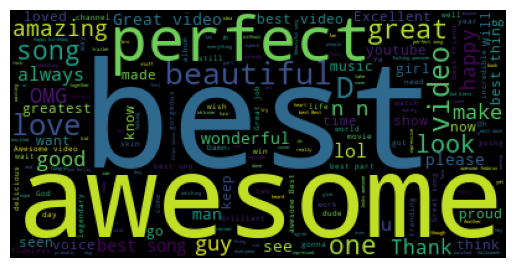

In [129]:
plt.imshow(postitve_wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

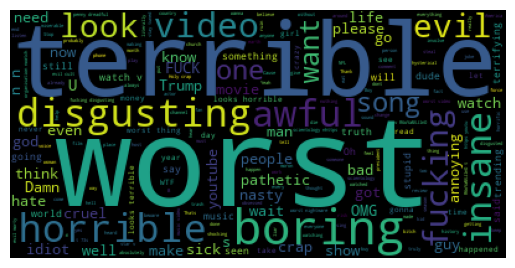

In [131]:
plt.imshow(negative_wordcloud)
plt.axis('off')

In [133]:
!pip install emoji


In [134]:
import emoji
file['comment_text'].head(9)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
Name: comment_text, dtype: object

In [137]:
trending_comment = file['comment_text'].iloc[4]
trending_comment

'trending 😉'

In [139]:
emoji_list = []

for comment in file['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [140]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [141]:
from collections import Counter

In [142]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [147]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [149]:
total_emoji = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
total_emoji

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [151]:
total_count = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
total_count

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

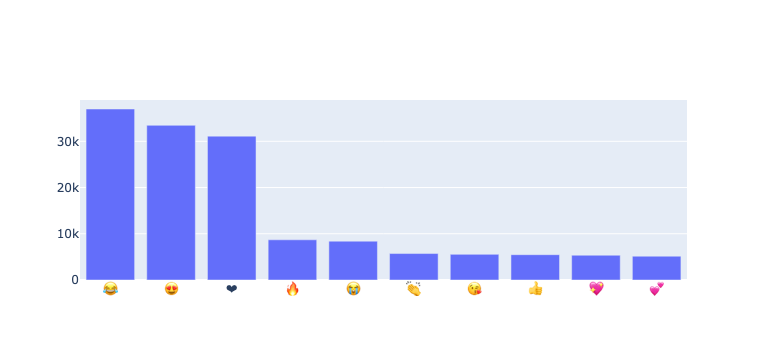

In [153]:
import plotly.graph_objs as go
from plotly.offline import iplot
chart = go.Bar(x = total_emoji,y=total_count)
iplot([chart])

In [155]:
import os
files= os.listdir()


In [157]:
csv_files = [file for file in files if '.csv' in file]
csv_files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [159]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [161]:
import pandas as pd
import glob

# List all CSV files in the current directory
csv_files = glob.glob("*.csv")

# Read and concatenate all CSV files, skipping bad lines
df = pd.concat((pd.read_csv(file, encoding='ISO-8859-1', on_bad_lines='skip') for file in csv_files), ignore_index=True)

# Display the resulting DataFrame
print(df)



            video_id trending_date  \
0        SbOwzAl9ZfQ      17.14.11   
1        klOV6Xh-DnI      17.14.11   
2        6L2ZF7Qzsbk      17.14.11   
3        hcY52MFWMDM      17.14.11   
4        _OXDcGPVAa4      17.14.11   
...              ...           ...   
1067337  EoejGgUNmVU           NaN   
1067338  EoejGgUNmVU           NaN   
1067339  EoejGgUNmVU           NaN   
1067340  EoejGgUNmVU           NaN   
1067341  EoejGgUNmVU           NaN   

                                                     title  \
0                           CapÃ­tulo 12 | MasterChef 2017   
1        ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2                 LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3         Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4                 DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
...                                                    ...   
1067337                                                NaN   
1067338                                        

In [162]:
df.shape

(1067342, 18)

In [163]:
df[df.duplicated()].shape

(249110, 18)

In [164]:
df = df.drop_duplicates()
df.shape

(818232, 18)

In [165]:
df[0:1000].to_csv(r'/Users/sheronroy/Desktop/additional_data.csv', index = False)

In [168]:
df[0:1000].to_json(r'/Users/sheronroy/Desktop/additional_data.json')

In [170]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:////Users/sheronroy/Desktop/additional_data.sqlite')

In [175]:
df[0:1000].to_sql('Users', con = engine, if_exists = 'append')

1000

In [177]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,NaN,NaN
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,NaN,NaN
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,NaN,NaN
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,NaN,NaN
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,NaN,NaN


In [179]:
df['category_id'].unique()

array([24., 22., 25., 26., 10., 23., 17.,  2.,  1., 29., 27., 28., 20.,
       15., 19., 43., 30., 44., nan])

In [181]:
import pandas as pd
category_file = pd.read_json('US_category_id.json')
category_file

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [183]:
category_items = category_file['items']
category_items

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [185]:
first_item = category_items[0]
first_id = first_item['id']
first_id
first_item

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [187]:
first_item = category_items[0]
first_category = first_item['snippet']['title']
first_category

'Film & Animation'

In [189]:
category_list = []
id_list = []

for item in category_items:
    id_list.append(int(item['id']))

print(id_list)

for item in category_items:
    category_list.append(item['snippet']['title'])

print(category_list)

result = dict(zip(id_list,category_list))
result


[1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [192]:
df['Category_name'] = df['category_id'].map(result)
df.iloc[374362]

video_id                   _ANP3HR1jsM
trending_date                      NaN
title                              NaN
channel_title                      NaN
category_id                        NaN
publish_time                       NaN
tags                               NaN
views                              NaN
likes                            likes
dislikes                           NaN
comment_count                      NaN
thumbnail_link                     NaN
comments_disabled                  NaN
ratings_disabled                   NaN
video_error_or_removed             NaN
description                        NaN
comment_text              comment_text
replies                        replies
Category_name                      NaN
Name: 417529, dtype: object

In [194]:
df.drop(374362, axis=0, inplace=False)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies,Category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,NaN,NaN,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,NaN,NaN,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,NaN,NaN,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,NaN,NaN,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,NaN,NaN,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067301,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lost on you ! ð\nOH My God I love this song...,0,NaN
1067308,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I LOVE LPâ¤ï¸,0,NaN
1067334,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*L O S T O N Y O U*,0,NaN
1067335,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<3,0,NaN


ValueError: Unable to parse string "likes" at position 374362

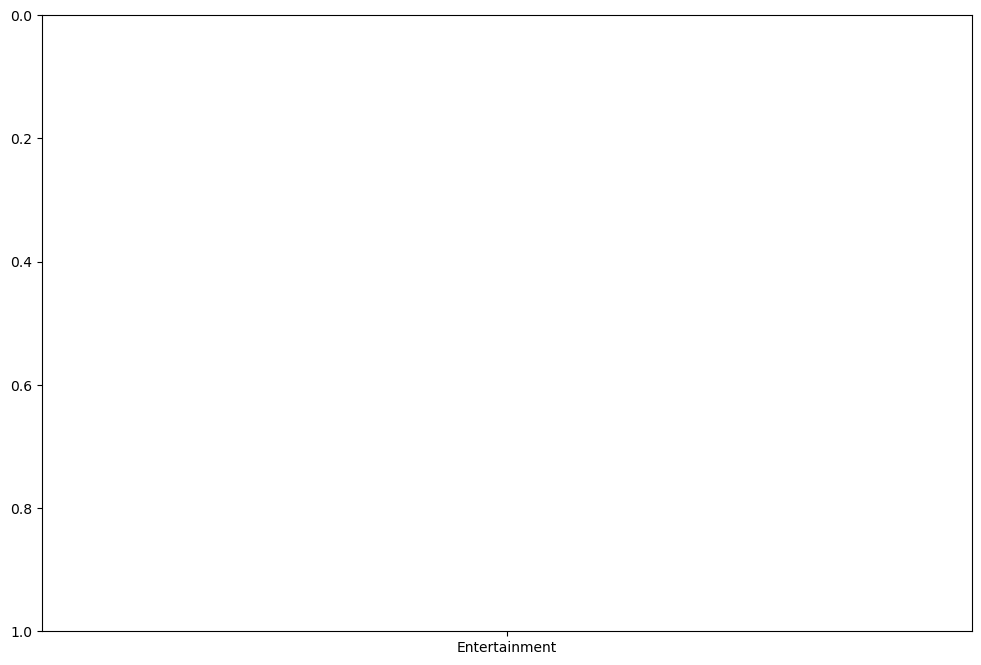

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Category_name', y= 'likes', data = df)
plt.xticks(rotation='vertical')



In [207]:
df['like_views'] = (df['likes']/df['views'])*100
df['dislike_views'] = (df['dislikes']/df['views'])*100
df['comment_views'] = (df['comment_count']/df['views'])*100
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'comment_text', 'replies',
       'Category_name', 'like_views', 'dislike_views', 'comment_views'],
      dtype='object')

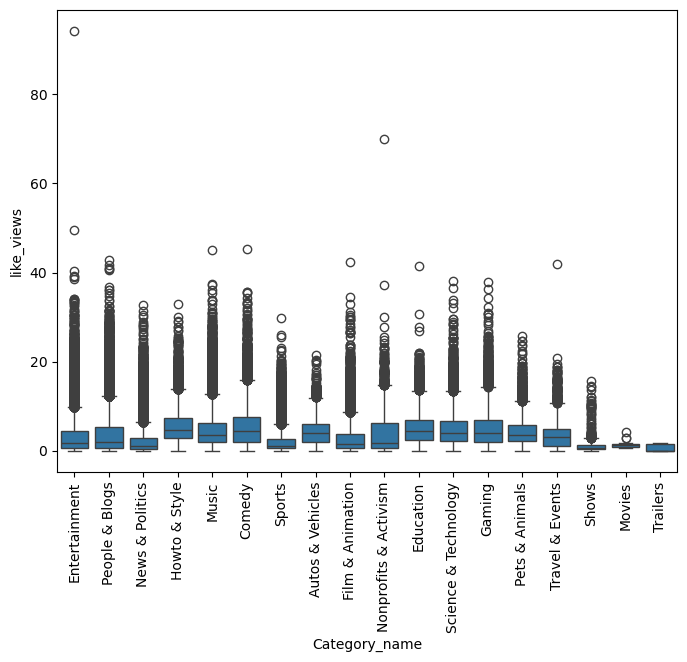

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x = 'Category_name', y= 'like_views', data = df)
plt.xticks(rotation='vertical')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

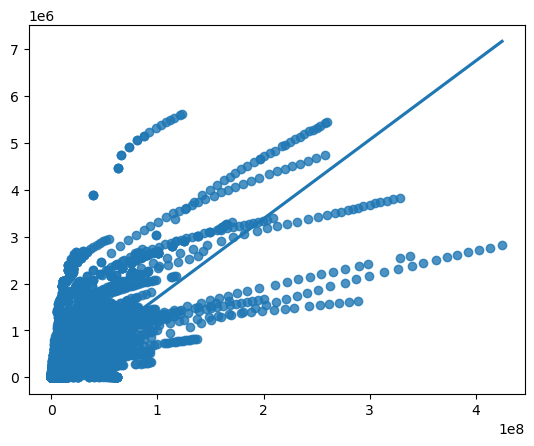

In [201]:
sns.regplot(x='views', y='likes', data=df)

In [ ]:
df[['likes','views','dislikes']].corr()

In [ ]:
sns.heatmap(df[['likes','views','dislikes']].corr(), annot=True)

In [211]:
df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies,Category_name,like_views,dislike_views,comment_views
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182,361.0,...,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,NaN,NaN,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271,174.0,...,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,NaN,NaN,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105,266.0,...,False,False,False,La canciÃ³n del principio se llama âEste esp...,NaN,NaN,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378,171.0,...,False,False,False,El video es de un Walmart en el pais centroame...,NaN,NaN,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781,681.0,...,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,NaN,NaN,Howto & Style,11.557009,0.136210,1.485704
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10.0,2017-11-12T20:17:38.000Z,[none],129645.0,506,67.0,...,False,False,False,Un fuerte sismo ha afectado en la noche de est...,NaN,NaN,Music,0.390297,0.051680,0.184350


In [215]:
df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

In [227]:
cdf = df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [235]:
cdf.rename(columns = {0:'total_videos'}, inplace = True)

In [237]:
cdf

,channel_title,total_values
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


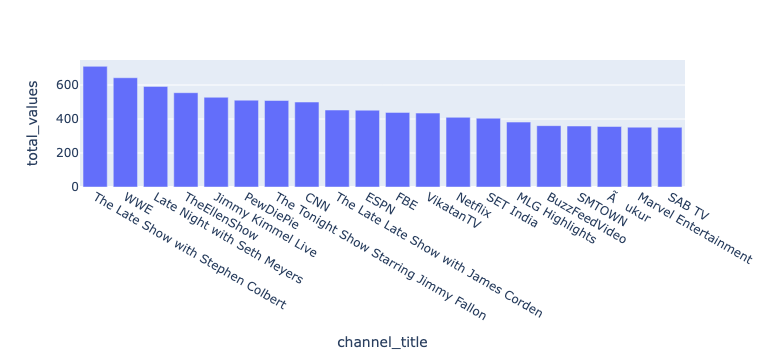

In [239]:
import plotly.express as px
px.bar(data_frame = cdf[0:20], x ='channel_title' , y='total_values' )

In [317]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies,Category_name,like_views,dislike_views,comment_views
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182,361.0,...,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,NaN,NaN,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271,174.0,...,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,NaN,NaN,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105,266.0,...,False,False,False,La canciÃ³n del principio se llama âEste esp...,NaN,NaN,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378,171.0,...,False,False,False,El video es de un Walmart en el pais centroame...,NaN,NaN,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781,681.0,...,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,NaN,NaN,Howto & Style,11.557009,0.136210,1.485704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067301,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,Lost on you ! ð\nOH My God I love this song...,0,NaN,NaN,NaN,NaN
1067308,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,I LOVE LPâ¤ï¸,0,NaN,NaN,NaN,NaN
1067334,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,*L O S T O N Y O U*,0,NaN,NaN,NaN,NaN
1067335,EoejGgUNmVU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,<3,0,NaN,NaN,NaN,NaN


In [318]:
df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [321]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [323]:
punctuation_list = [string.punctuation]
punctuation_list

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']

In [364]:
len([char for char in df['title'][0] if char in string.punctuation])

1

In [386]:
def check_punc(title):
    return len([char for char in title if char in string.punctuation])
sample_df = df[0:1001]


0       1.0
1       3.0
2       1.0
3       1.0
4       1.0
       ... 
996     0.0
997     7.0
998     4.0
999     0.0
1000    1.0
Name: Punctuation_count, Length: 1001, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

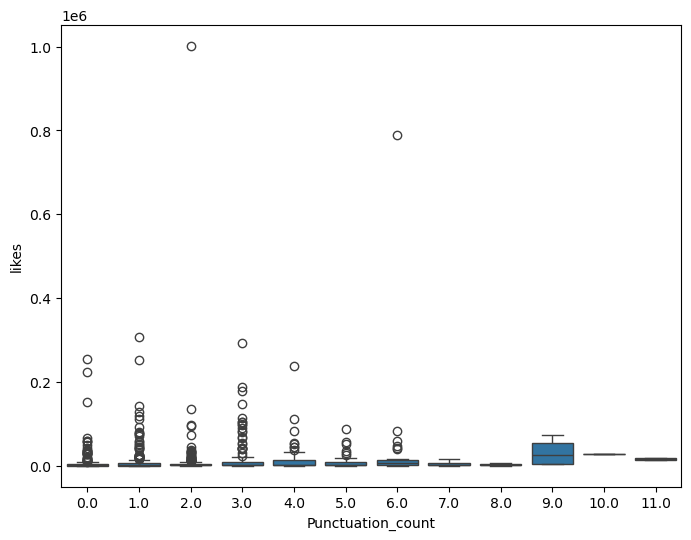

In [392]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Punctuation_count',y='likes',data = sample_df)
plt.show